### Introduction
Unsupervised Learning Algorithms dont make use of a target, instead, their purpose is to learn some property of the data, to represent the structures of the features in a certain way. In the context of feature engineering for prediction, we could think of an unsupervised algorithm as a "feature discovery" technique.

###### Clustering
simply means the assigning of data points to groups based upon how similar the points are to each other. A clustering algorithm makes "birds of a feather flock together," so to speak.

When used for feature engineering, we could attempt to discover groups of customers representing a market segment, for instance, or geographic areas that share similar weather patterns. Adding a feature of cluster labels can help machine learning models untangle complicated relationships of space or proximity.

### Cluster Labels as a Feature
Applied to a single real-valued feature, clustering acts like a traditional "binning" or "discretization" transform. On multiple features, it's "multi-dimensional binning" (sometimes called vector quantization).

The motivating idea for adding cluster labels is that the clusters will break up complicated relationships across features into simpler chunks. OUr model can then just learn the simpler chunks one-by-one instead having to learn the complicated whole all at once. It's "divide and conquer" strategy.

<img src="https://i.imgur.com/rraXFed.png" width="800" height="400">

The figure shows how clustering can improve a simle linear model. The curved relationship between the YearBuilt and salePrice is too complicated for this kind of model -- it underfits. On smaller chunks however the relationship is almostlinear, and that the model can learn easily.



### K-Means Clustering
There are a great many clustering algorithms. They differ primarily in how they measure "similarity" or "Proximity" and in what kinds of features they work with. The algorithm we'll use, k-means, is intuitive and easy to apply in feature engineering context. Depending on your application another algorithm might be more appropirate. 

K-mean clustering measures similarity using ordinary straight-line distance (Eculidean distance, in other words). It creates clusters by placing a number of points, called centroids, inside the feature-space. Each point in the dataset is assigned to the cluster of whichever centroid it's closest to. The 'K' in 'k-means' is how many centroids it creates. we define the k. 

we could imagine each centroid capturing points through a sequence of radiating circles. When sets of circles from competing centroids overlap they form a line. The result is what's called a Voronoi tessalation. The tessalation shows us to what clusters future data will be assigned; the tessalation is essentially what k-means learns from its training data.

The clustering on the Ames housing dataset is k-means clustering. 

<img src="https://i.imgur.com/KSoLd3o.jpg.png">

#### Reviewing how k-means algorithm learns the clusters and what that means for feature engineering
We focus on three parameters from scikit-learn;s implementation: n_clusters, max_iter, and n_init

It's simple two-step process. The algorithm starts by randomly initializing some predefined number (n_clusters) of centroids. It then iterates over these two operations:

1. assign points to the nearest cluster centroid
2. move each centroid to minimize the distance to its points

It iterates over these two steps until the centroids aren't moving anymore, or untill some maximum number of iterations has passed(max_iter).

It often happens that the initial random position of the centroids ends in a poor clustering. For this reason the algorithm repeats a number of times(n_init) and returns the clustering that has the least total distance between each point and its centroid, the optimal clustering.

The animuation below shows the algorithm in action. It illustrates the dependence of the result on the initial centroids and the importance of iterating until convergence.

<img src="https://i.imgur.com/tBkCqXJ.gif">

We may need to increase the max_iter for a large number of clusters or n_init for a complex dataset. Ordinarily though the only parameter you'll need to choose your self is n_clusters(k). The best partitioning for a set of features depends on the model you're using and what you're trying to predict, so it's best to tune it like any hyperparameter(Through cross-validation).

#### Example - California Housing

As spatial features, California Housing's 'Latitude' and 'Longtitude' make natural candidates for k-means clustering. In this example we'll cluster these with 'MedInc' (median income) to create economic segments in different regions of California.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use('seaborn-v0_8-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes',
      labelweight='bold',
      labelsize='large',
      titleweight='bold',
      titlesize=4,
      titlepad=10)

In [7]:
#load data
df = pd.read_csv('./data/housing.csv')
X = df.loc[:, ['MedInc', 'Latitude', 'Longitude']]
X.head(5)

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


K-means clustering is sensitive to scale, we should rescale or normalize data with extreme values. OUr features are already roughly on the same scale, so we'll leave them as-is.

In [16]:
#Create cluster feature
kmeans = KMeans(n_clusters=6)
X['Cluster'] = kmeans.fit_predict(X)
X['Cluster'] = X['Cluster'].astype('category')

X.head()

/opt/miniconda3/envs/pro_project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,4
1,8.3014,37.86,-122.22,4
2,7.2574,37.85,-122.24,4
3,5.6431,37.85,-122.25,4
4,3.8462,37.85,-122.25,1


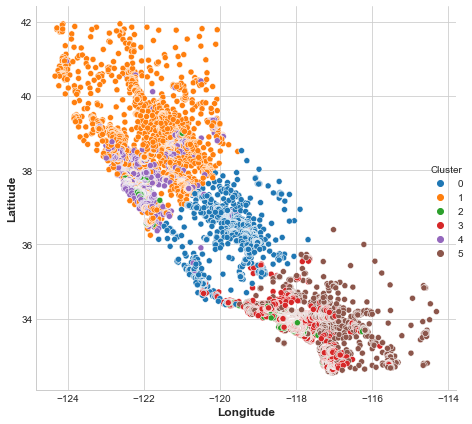

In [17]:
#plot scatter plot
sns.relplot(x='Longitude', y='Latitude', hue='Cluster', data=X, height=6);

Scatter plot above shows the geographic distribution of the clusters. It created separate segments for higher-income areas on the coasts.

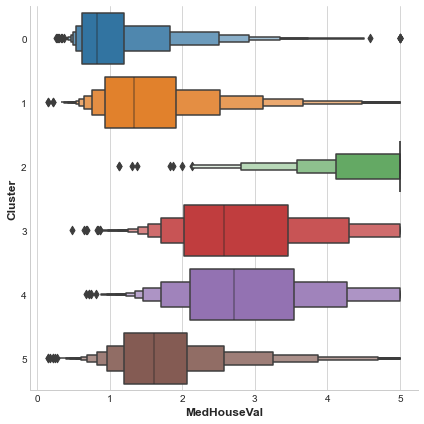

In [20]:
#plot box-plots
X['MedHouseVal'] = df['MedHouseVal']
sns.catplot(x='MedHouseVal', y='Cluster', data=X, kind='boxen', height=6)

These box-plots show the distribution of the target within each cluster. If the clustering is informative, these distributions should, for the most part, separate across MedHouseVal, which is indeed what we see.